In [1]:
%pip install sqlmodel -q


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from typing import Optional
from sqlmodel import SQLModel, Field, create_engine, Session

# SQL Model uses Pydantic Models under the hood

class Character(SQLModel, table=True):
    id: Optional[int] = Field(default=None, primary_key=True)
    name: str
    race: str
    character_class: str
    level: int
    background: str
    player_name: Optional[str] = None
    experience_points: int = 0
    strength: int
    dexterity: int
    constitution: int
    intelligence: int
    wisdom: int
    charisma: int
    hit_points: int
    armor_class: int
    alignment: str
    skills: str  # Storing as comma-separated string
    languages: str  # Storing as comma-separated string
    equipment: str  # Storing as comma-separated string
    spells: Optional[str] = None  # Storing as comma-separated string

    def _repr_llm_(self):
        return f"<Character {self.id} {self.name}>"
    
    def __repr__(self):
        return f"<Character {self.id} {self.name}>"

# SQLite Database URL
DATABASE_URL = "sqlite:///:memory:"
engine = create_engine(DATABASE_URL)

# Create the database tables
SQLModel.metadata.create_all(engine)

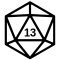

13

In [3]:
import random
from IPython.display import SVG

def d20(roll):
    return SVG(f"""<svg xmlns="http://www.w3.org/2000/svg" width="60" height="60" viewBox="0 0 1200 1200">
    <path d="M1102.8 896.4c1.2-1.2 1.2-2.398 1.2-2.398V318.004c0-1.2-1.2-1.2-1.2-2.399v-1.199c0-1.2-1.2-1.2-1.2-1.2v-1.198l-1.198-1.2s-1.2-1.199-2.399-1.199h-1.199l-486-282.01c-7.2-3.601-15.602-3.601-21.602 0l-483.6 279.6c-1.2 0-1.2 1.2-2.398 1.2h-1.2l-3.597 3.597s0 1.2-1.2 1.2l-1.199 1.198v1.2s0 1.199-1.199 1.199v571.196c0 1.198 1.2 2.397 1.2 3.6 0 1.2 1.198 2.4 2.398 3.602v1.2C98.399 898.8 99.602 900 100.8 900l2.399 2.398h2.398l483.6 279.6s1.2 0 1.2 1.2h17.988s1.198 0 1.198-1.2l483.6-279.6h2.399s1.199 0 1.199-1.199l1.2-1.2s1.198 0 1.198-1.198l1.2-1.2s0-1.199 1.199-1.199c.02 1.2.02-.004 1.219-.004zm-960-445.2 134.4 333.6c1.2 3.602 0 8.398-4.8 10.801l-123.6 51.602c-4.802 2.398-10.802-1.2-10.802-7.2l.004-387.61c0-2.398 3.602-3.597 4.8-1.198zm696 331.2H361.2c-6 0-9.602-7.2-7.2-12l238.8-414c3.602-4.8 10.802-4.8 13.2 0l238.8 414c3.598 6 0 12-6 12zm-531.6-43.199-154.8-382.8c-2.398-4.8 1.2-10.801 7.2-10.801L546 326.401c6 0 10.8 6 7.198 12l-232.8 402c-2.398 6-10.797 6-13.199-1.2zm526.8 100.8-228 280.8c-3.602 3.602-9.602 3.602-12 0l-228-280.8c-3.602-4.8 0-13.199 6-13.199h456c6 0 9.602 8.398 6 13.199zm45.602-99.602-232.8-402c-3.602-6 1.2-12 7.2-12l386.4 19.199c6 0 8.398 6 7.198 10.801l-154.8 382.8c-2.402 7.2-10.8 7.2-13.199 1.2zm-258-466.8v-175.2c0-6 7.2-9.602 12-7.2l350.4 202.8c2.398 1.2 1.2 4.802-1.2 4.802l-354-18c-3.6 0-7.198-3.602-7.198-7.2zm-51.602 7.2-354 18c-2.398 0-3.602-3.602-1.2-4.802l351.6-201.6c4.802-3.601 12 1.2 12 7.2v174c0 3.601-3.597 7.203-8.398 7.203zm-264 555.6 193.2 238.8c1.2 2.398-1.2 4.8-3.602 3.6l-315.6-182.4c-6-3.6-4.8-12 1.2-14.397l116.4-48c2.402-1.2 6.003 0 8.402 2.398zm596.4-2.4 116.4 48c6 2.4 7.2 10.802 1.2 14.399l-316.8 182.4c-2.4 1.199-4.802-1.2-3.602-3.602l193.2-238.8c3.601-2.398 7.203-3.597 9.601-2.398zm148.8 13.2-123.6-51.602c-3.602-1.2-6-6-4.8-10.801l134.4-333.6c1.198-2.399 4.8-1.2 4.8 1.199l.004 387.61c0 6-6 9.602-10.801 7.2z"/>
    <text x="600" y="660" font-family="Helvetica" font-size="220" font-weight="bold" fill="black" text-anchor="middle" alignment-baseline="middle">
        {roll}
    </text>
</svg>""")

def roll_die(sides: int = 6):
    """Roll a die with the given number of sides."""
    roll = random.randint(1, sides)

    if(sides == 20):
        display(d20(roll))
    
    return roll

# Function to add a new character
def add_character(character: Character):
    """Adds a character to our characters database"""
    with Session(engine) as session:
        session.add(character)
        session.commit

    return character

roll_die(20)

In [4]:
from chatlab import FunctionRegistry

fr = FunctionRegistry()
fr.register_functions([roll_die, add_character])

In [5]:
from openai import OpenAI
client = OpenAI()

In [6]:
from chatlab import tool_result

async def chatloop(initial_messages):
    """Emit messages encountered as well as tool results, making sure to autorun tools and respond to the model."""
    buffer = initial_messages.copy()

    resp = client.chat.completions.create(
        model="gpt-3.5-turbo-1106",
        messages=initial_messages,

        # Pass in the tools from the function registry. The model will choose
        # whether it uses 0, 1, 2, or N many tools.
        tools=fr.tools,
        tool_choice="auto"
    )

    message = resp.choices[0].message
    buffer.append(message)

    yield message

    # call each of the tools
    if message.tool_calls is not None:
        for tool in message.tool_calls:
            result = await fr.call(tool.function.name, tool.function.arguments)

            # An assistant message with 'tool_calls' must be followed by tool messages responding to each 'tool_call_id'.
            tool_call_response = tool_result(tool.id, content=str(result))
            yield tool_call_response
            buffer.append(tool_call_response)
        
        # Once all tools have been called, call the model again
        async for m in chatloop(buffer):
            yield m


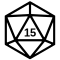

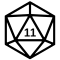

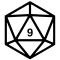

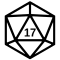

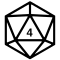

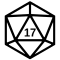

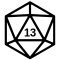

> Here are the rolled stats:
> - Strength: 15
> - Perception: 11
> - Endurance: 9
> - Charisma: 17
> - Intelligence: 4
> - Agility: 17
> - Luck: 13

In [7]:
from pydantic import BaseModel
from chatlab import system, user, Markdown

async for message in chatloop([
        system("Create your character for the Fallout RPG. The user is the DM."),
        user("Roll for the following stats: Strength, Perception, Endurance, Charisma, Intelligence, Agility, and Luck.")
    ]):
    # When message is a pydantic model, convert to a dict

    if isinstance(message, BaseModel):
        message = message.model_dump()

    role = message['role']
    content = message.get('content')

    if(role == "assistant" and content is not None):
        display(Markdown("> " + content.replace("\n", "\n> ")))
    if(role == "tool"):
        pass 